In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlflow

In [2]:
# Carregar os dados
df = pd.read_csv("Telco-Customers.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


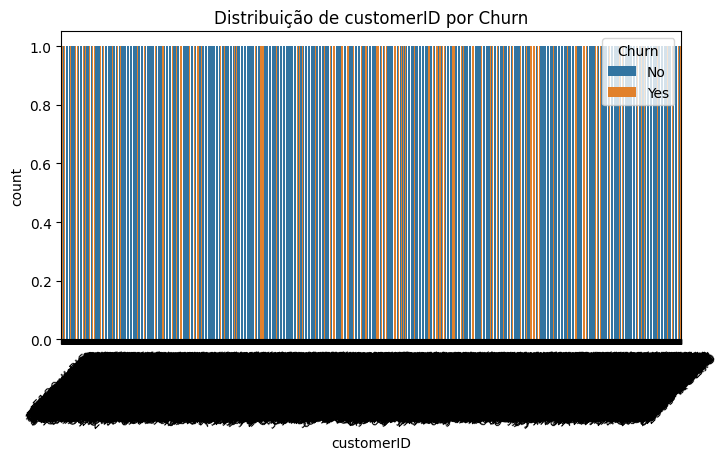

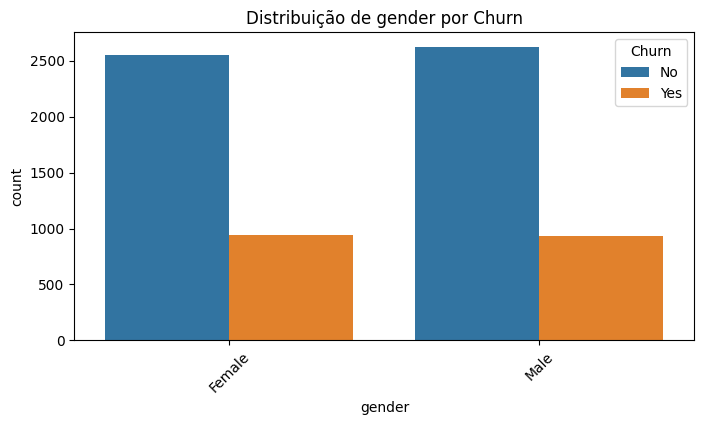

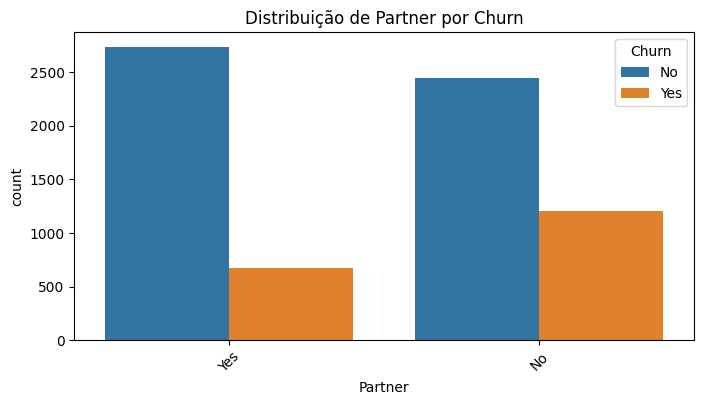

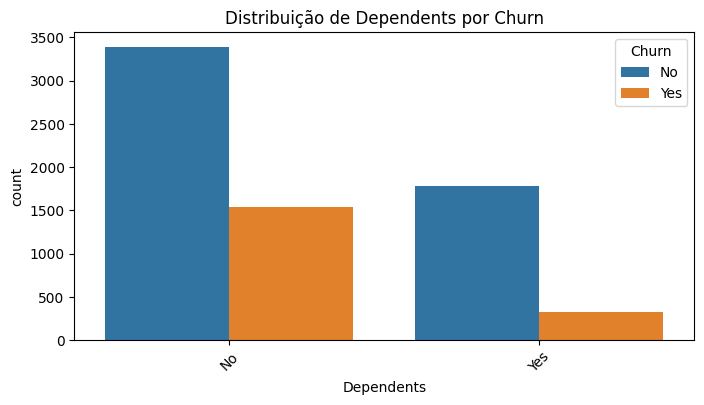

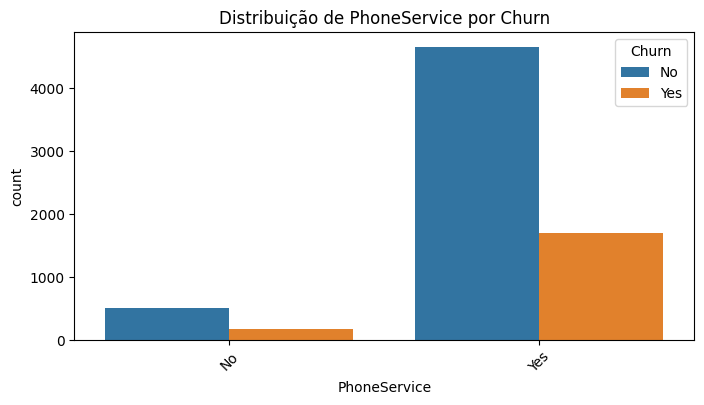

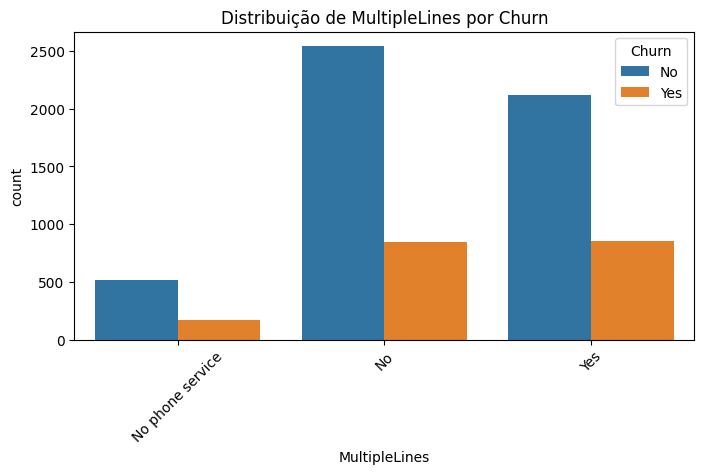

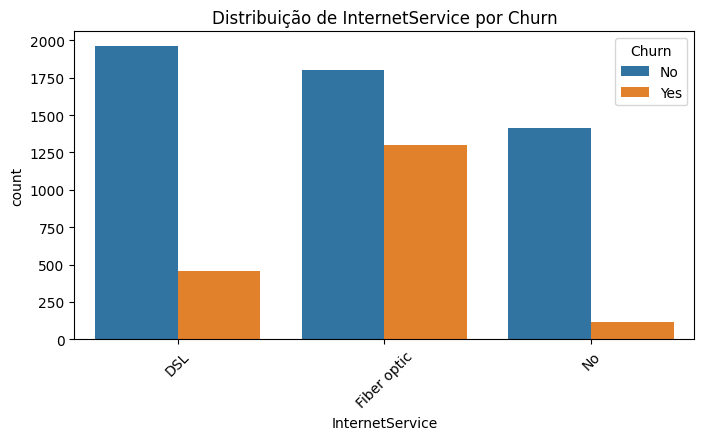

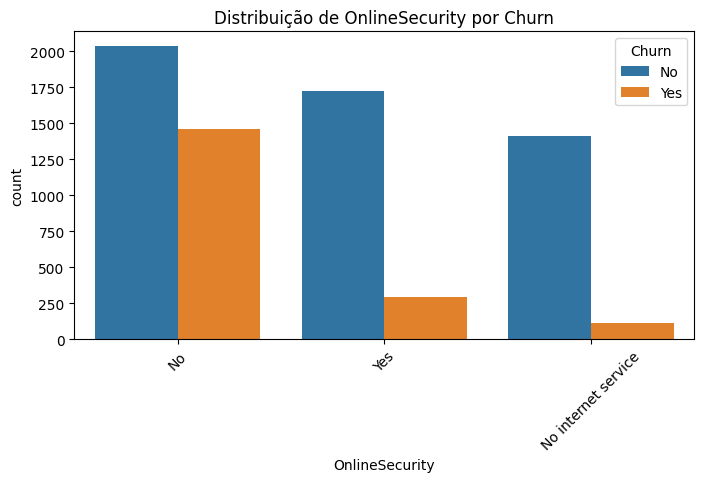

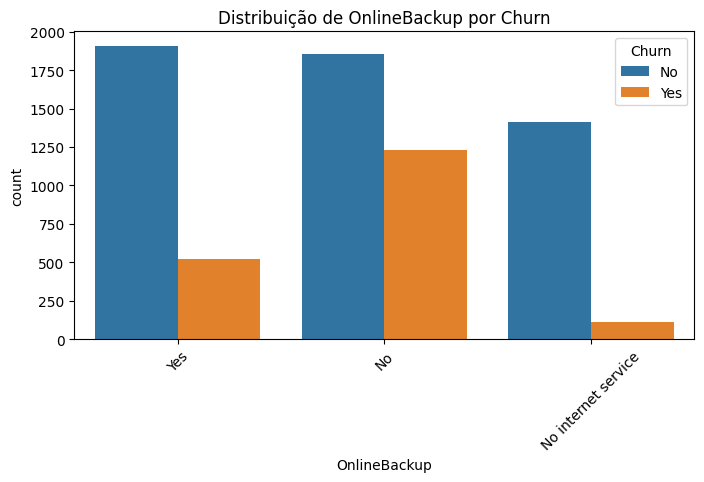

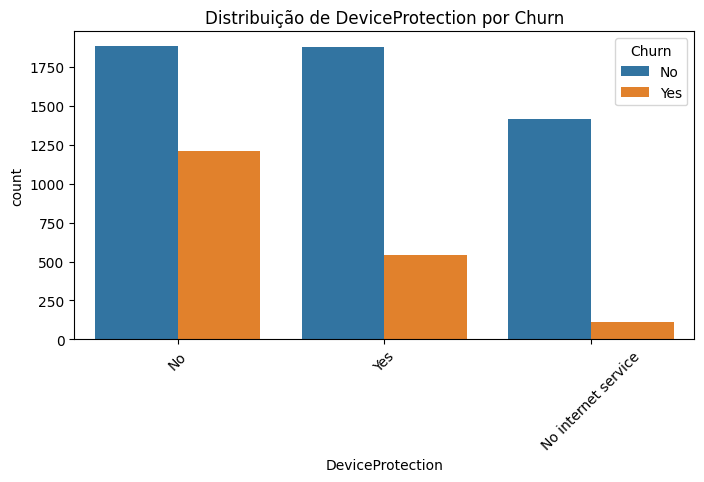

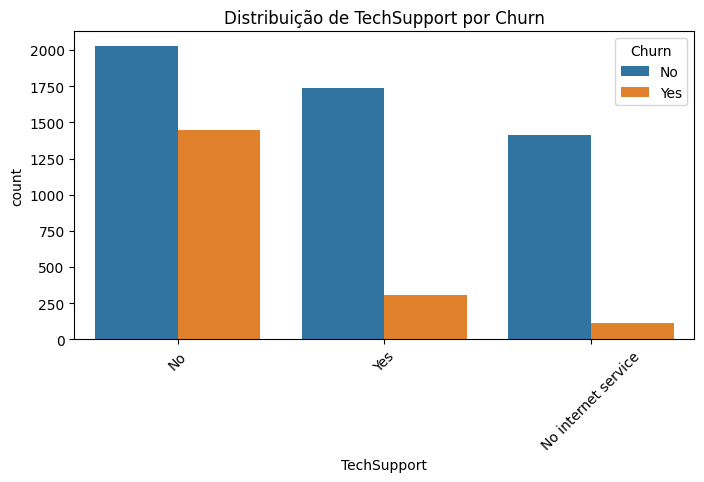

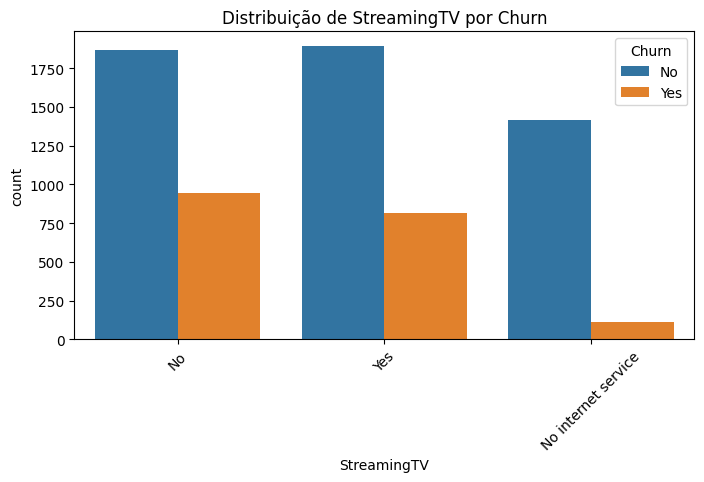

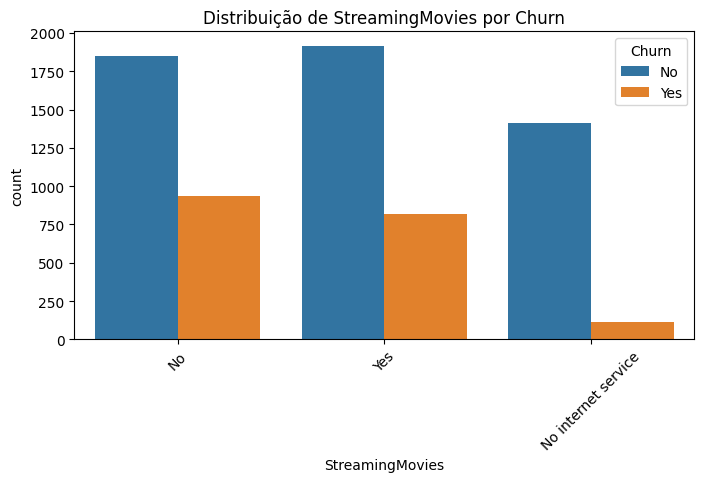

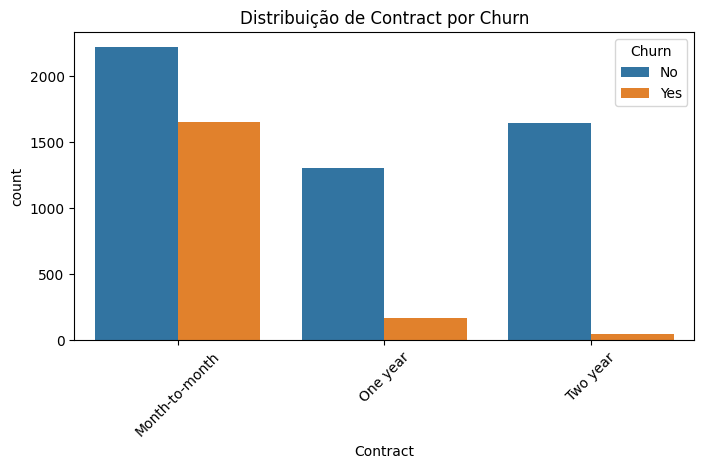

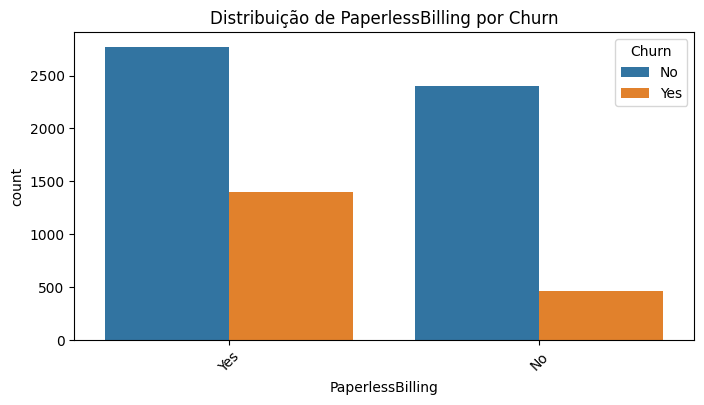

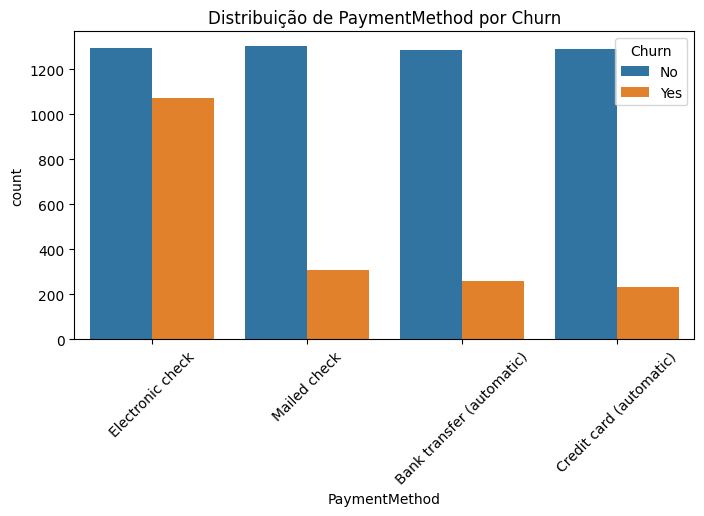

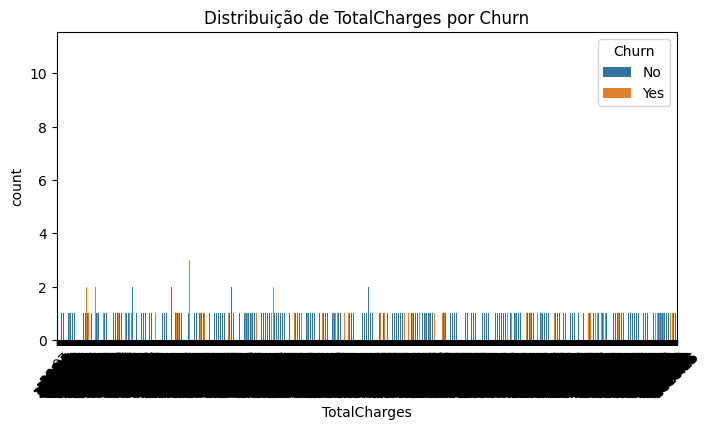

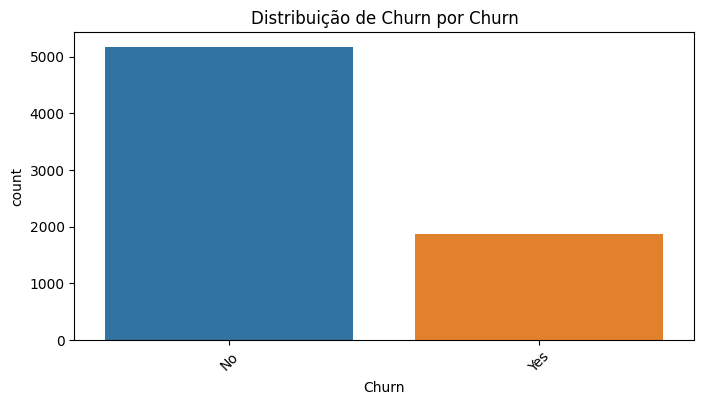

In [6]:
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue="Churn", data=df)
    plt.title(f"Distribuição de {feature} por Churn")
    plt.xticks(rotation=45)
    plt.show()

In [7]:
# Tratar valores ausentes
df = df.dropna()

In [8]:
# Transformar as variáveis categóricas em variáveis dummies
df = pd.get_dummies(df, drop_first=True)

In [9]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Dividir o conjunto de dados de treinamento e teste
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Imports para o modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Criar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Inferir e valiar o modelo
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7636621717530163

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86      1036
           1       0.77      0.15      0.26       373

    accuracy                           0.76      1409
   macro avg       0.77      0.57      0.56      1409
weighted avg       0.77      0.76      0.70      1409



In [15]:
# Registrar o modelo e métricas no MLflow
import os

os.environ["MFLOW_TRACKING_URI"] = "http://127.0.0.1:5000"
os.environ["MFLOW_ARTIFACTS_URI"] = "./artifacts"

with mlflow.start_run() as run:
    mlflow.log_param("modelo", "Regressão Logística")
    mlflow.log_metric("acuracia", accuracy_score(y_test, y_pred))
    mlflow.sklearn.log_model(model, "modelo_regressao_logistica")

    run_id = run.info.run_id
    model_uri = f"runs:/{run_id}/modelo"
    mlflow.register_model(model_uri, "ModeloChurn")

Registered model 'ModeloChurn' already exists. Creating a new version of this model...
Created version '4' of model 'ModeloChurn'.


In [16]:
import mlflow
logged_model = 'runs:/c942840a43c24c2289a1b808e41ff80e/modelo_regressao_logistica'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
predict = loaded_model.predict(pd.DataFrame(X_test))

In [17]:
predict

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [18]:
# Calcular as métricas de desempenho
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1036
           1       0.77      0.15      0.26       373

    accuracy                           0.76      1409
   macro avg       0.77      0.57      0.56      1409
weighted avg       0.77      0.76      0.70      1409

